In [18]:
import os
import sys
import numpy as np
import PIL.Image

import torch
import torchvision

sys.path. append('../icnn_torch')
from icnn import reconstruct_stim
from utils import normalise_img, img_preprocess,img_deprocess, get_cnn_features


In [19]:
#load CNN model from torchvision
#net = torchvision.models.resnet50(pretrained=True)
#net = torchvision.models.vgg19(pretrained=True)
net = torchvision.models.alexnet(pretrained=True)

#set the evaluation model
net.eval()

#set the preprocessing methods 
img_mean=np.array([0.485, 0.456, 0.406]).astype(np.float32)
img_std=np.array([0.229, 0.224, 0.225]).astype(np.float32)
norm  = 255 # image is converted from 0-255 into 0-1
#pytorch model is generally RGB input, not BGR
bgr = False

In [20]:
#save_dir
save_dir = './result'
save_folder = 'icnn_shortest_demo'
save_path = os.path.join(save_dir,save_folder)
os.makedirs(save_path, exist_ok=True)

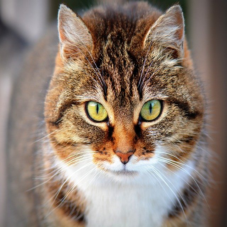

In [21]:
#load image and reshape into 227, 227 (for alexnet)
org_img = PIL.Image.open('cat_sample_img.jpg').resize((227,227), resample=2)
org_img


In [22]:
#convert to np.array
org_img = np.array(org_img)

In [23]:
#preprocessing image for pytorch model
prep_img = img_preprocess(np.asarray(org_img), img_mean, img_std, norm)
#prep_img.shape => (3, 227, 227)

In [24]:
#Convert tensor
inputs = torch.tensor(prep_img[np.newaxis])

In [25]:
#show model for selecting layer
net

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [26]:
#selct target layers as a list
target_layer_list = ['features[0]', 'features[3]', 'features[6]', 'features[8]','features[10]',
                                       'classifier[1]', 'classifier[4]', 'classifier[6]']

target_layer_list =target_layer_list = [ 'features[3]']

In [27]:
#obtain feature for the input
features = get_cnn_features(net, inputs, target_layer_list)

In [28]:
target_layer_dict = dict(zip(target_layer_list, features))

In [31]:
opts = {
    # Loss function type: {'l2', 'CorrLoss', 'FeatCorrLoss'}
    'loss_type': 'CorrLoss',
    
    'img_mean': img_mean,
    'img_std' : img_std,
    'norm': norm,
    'bgr': bgr,

    # The initial image for the optimization (setting to None will use random
    # noise as initial image)
    'initial_input': None,

    # A python dictionary consists of channels to be selected, arranged in
    # pairs of layer name (key) and channel numbers (value); the channel
    # numbers of each layer are the channels to be used in the loss function;
    # use all the channels if some layer not in the dictionary; setting to None
    # for using all channels for all layers;
    'channel': None,
    
    'iter_n': 200,
    
    'input_size': (227,227,3),
    
    'opt_name' : 'Adam',
   
}

In [32]:
# perform reconstruction
recon_img, loss_list = reconstruct_stim(target_layer_dict, net, **opts)

iter=1; err=-0.370132;
iter=2; err=-0.385554;
iter=3; err=-0.299474;
iter=4; err=-0.456004;
iter=5; err=-0.422653;
iter=6; err=-0.475306;
iter=7; err=-0.464701;
iter=8; err=-0.478815;
iter=9; err=-0.479806;
iter=10; err=-0.485086;
iter=11; err=-0.490566;
iter=12; err=-0.491591;
iter=13; err=-0.50004;
iter=14; err=-0.498081;
iter=15; err=-0.505428;
iter=16; err=-0.505535;
iter=17; err=-0.510324;
iter=18; err=-0.511525;
iter=19; err=-0.51636;
iter=20; err=-0.51542;
iter=21; err=-0.520057;
iter=22; err=-0.522602;
iter=23; err=-0.522283;
iter=24; err=-0.528567;
iter=25; err=-0.523858;
iter=26; err=-0.535242;
iter=27; err=-0.529143;
iter=28; err=-0.539259;
iter=29; err=-0.535126;
iter=30; err=-0.54012;
iter=31; err=-0.53946;
iter=32; err=-0.545563;
iter=33; err=-0.544855;
iter=34; err=-0.551503;
iter=35; err=-0.548883;
iter=36; err=-0.556076;
iter=37; err=-0.551947;
iter=38; err=-0.561164;
iter=39; err=-0.556186;
iter=40; err=-0.567846;
iter=41; err=-0.558959;
iter=42; err=-0.573163;
iter=4

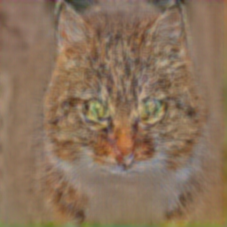

In [33]:
PIL.Image.fromarray(np.uint8(recon_img))

In [36]:
#We can select multiple layers 
target_layer_list = ['features[0]', 'features[3]', 'features[6]']

In [37]:
#obtain feature for the input
features = get_cnn_features(net, inputs, target_layer_list)
target_layer_dict = dict(zip(target_layer_list, features))

#optional: layer weight

# Use the inverse of the squared norm of the CNN features as the weight for each layer
weights = np.ones(len(features)).astype(np.float32)
# Normalise the weights such that the sum of the weights = 1
weights = weights / weights.sum()

#layer_weight = dict(zip(layer_list, weights))
layer_weight= dict(zip(target_layer_list, weights))


In [38]:
opts = {
    # Loss function type: {'l2', 'CorrLoss', 'FeatCorrLoss'}
    'loss_type': 'CorrLoss',
    
    'img_mean': img_mean,
    'img_std' : img_std,
    'norm': norm,
    'bgr': bgr,
    
    # A python dictionary consists of weight parameter of each layer in the
    # loss function, arranged in pairs of layer name (key) and weight (value);
   'layer_weight': layer_weight,

    # The initial image for the optimization (setting to None will use random
    # noise as initial image)
    'initial_input': None,

    # A python dictionary consists of channels to be selected, arranged in
    # pairs of layer name (key) and channel numbers (value); the channel
    # numbers of each layer are the channels to be used in the loss function;
    # use all the channels if some layer not in the dictionary; setting to None
    # for using all channels for all layers;
    'channel': None,
    
    'iter_n': 500,
    
    'input_size': (227,227,3),
    
    'opt_name' : 'Adam',
   
}

In [39]:
# perform reconstruction
recon_img, loss_list = reconstruct_stim(target_layer_dict, net, **opts)

iter=1; err=-0.101447;
iter=2; err=-0.504622;
iter=3; err=-0.412141;
iter=4; err=-0.503492;
iter=5; err=-0.456504;
iter=6; err=-0.494242;
iter=7; err=-0.468284;
iter=8; err=-0.490632;
iter=9; err=-0.475944;
iter=10; err=-0.487659;
iter=11; err=-0.477626;
iter=12; err=-0.485058;
iter=13; err=-0.47926;
iter=14; err=-0.484625;
iter=15; err=-0.480144;
iter=16; err=-0.481219;
iter=17; err=-0.479862;
iter=18; err=-0.483244;
iter=19; err=-0.482298;
iter=20; err=-0.481438;
iter=21; err=-0.480565;
iter=22; err=-0.483992;
iter=23; err=-0.479644;
iter=24; err=-0.481996;
iter=25; err=-0.482862;
iter=26; err=-0.482881;
iter=27; err=-0.483372;
iter=28; err=-0.48326;
iter=29; err=-0.485331;
iter=30; err=-0.483495;
iter=31; err=-0.484603;
iter=32; err=-0.484023;
iter=33; err=-0.48789;
iter=34; err=-0.486054;
iter=35; err=-0.488657;
iter=36; err=-0.486518;
iter=37; err=-0.489223;
iter=38; err=-0.486753;
iter=39; err=-0.48909;
iter=40; err=-0.488472;
iter=41; err=-0.488644;
iter=42; err=-0.48911;
iter=4

iter=335; err=-0.723291;
iter=336; err=-0.677118;
iter=337; err=-0.727395;
iter=338; err=-0.678651;
iter=339; err=-0.728248;
iter=340; err=-0.683389;
iter=341; err=-0.730102;
iter=342; err=-0.686846;
iter=343; err=-0.732749;
iter=344; err=-0.690377;
iter=345; err=-0.733563;
iter=346; err=-0.692139;
iter=347; err=-0.737631;
iter=348; err=-0.694889;
iter=349; err=-0.737551;
iter=350; err=-0.696597;
iter=351; err=-0.741774;
iter=352; err=-0.699751;
iter=353; err=-0.741019;
iter=354; err=-0.704608;
iter=355; err=-0.74676;
iter=356; err=-0.706982;
iter=357; err=-0.746138;
iter=358; err=-0.709033;
iter=359; err=-0.747938;
iter=360; err=-0.712336;
iter=361; err=-0.751589;
iter=362; err=-0.714137;
iter=363; err=-0.753778;
iter=364; err=-0.716198;
iter=365; err=-0.75612;
iter=366; err=-0.718251;
iter=367; err=-0.756677;
iter=368; err=-0.721579;
iter=369; err=-0.759809;
iter=370; err=-0.724501;
iter=371; err=-0.76166;
iter=372; err=-0.728727;
iter=373; err=-0.764087;
iter=374; err=-0.731894;
ite

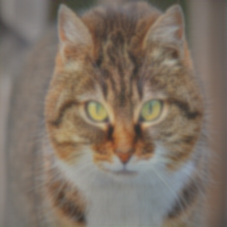

In [41]:
PIL.Image.fromarray(np.uint8(recon_img))